# <center><b>Final review</b></center> 

In [1]:
import pandas as pd
import numpy as np
import statistics 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
#importing all necessary packages

In [2]:
d=pd.read_csv("/home/hp/Desktop/7th_sem/fods/case-study/minute_weather.csv")

In [3]:
#-->preprocessing data

In [3]:
d.head(5)

rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1      1  2011-09-10 00:01:49         912.3     63.86               161.0   
2      2  2011-09-10 00:02:49         912.3     64.22                77.0   
3      3  2011-09-10 00:03:49         912.3     64.40                89.0   
4      4  2011-09-10 00:04:49         912.3     64.40               185.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             0.8               215.0             1.5                43.0   
2             0.7               143.0             1.2               324.0   
3             1.2               112.0             1.6                12.0   
4             0.4               260.0             1.0               100.0   

   min_wind_speed  rain_accumulation  rain_duration  relative_humidity  
0             1.0                NaN            NaN               60.5  
1             0.2                0.0            0.0               39.9  
2             0.3                0.0            0.0               43.0  
3             0.7                0.0            0.0               49.5  
4             0.1                0.0            0.0               58.8

In [4]:
d.set_index("rowID").head(5)

hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
rowID                                                                    
0      2011-09-10 00:00:49         912.3     64.76                97.0   
1      2011-09-10 00:01:49         912.3     63.86               161.0   
2      2011-09-10 00:02:49         912.3     64.22                77.0   
3      2011-09-10 00:03:49         912.3     64.40                89.0   
4      2011-09-10 00:04:49         912.3     64.40               185.0   

       avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
rowID                                                                           
0                 1.2               106.0             1.6                85.0   
1                 0.8               215.0             1.5                43.0   
2                 0.7               143.0             1.2               324.0   
3                 1.2               112.0             1.6                12.0   
4                 0.4               260.0             1.0               100.0   

       min_wind_speed  rain_accumulation  rain_duration  relative_humidity  
rowID                                                                       
0                 1.0                NaN            NaN               60.5  
1                 0.2                0.0            0.0               39.9  
2                 0.3                0.0            0.0               43.0  
3                 0.7                0.0            0.0               49.5  
4                 0.1                0.0            0.0               58.8

In [5]:
d.shape

(178859, 13)

In [6]:
d.dtypes

rowID                   int64
hpwren_timestamp       object
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
rain_accumulation     float64
rain_duration         float64
relative_humidity     float64
dtype: object

In [7]:
len(d['hpwren_timestamp'][0])

19

In [8]:
for i in d['hpwren_timestamp']:
    if len(i)!=19:
        print(i)

2012-01-12 09:49:


In [9]:
d.loc[d["hpwren_timestamp"]=="2012-01-12 09:49:"]

rowID   hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
178858  178858  2012-01-12 09:49:           NaN       NaN                 NaN   

        avg_wind_speed  max_wind_direction  max_wind_speed  \
178858             NaN                 NaN             NaN   

        min_wind_direction  min_wind_speed  rain_accumulation  rain_duration  \
178858                 NaN             NaN                NaN            NaN   

        relative_humidity  
178858                NaN

In [10]:
d.drop(d.index[178858],inplace=True)

In [11]:
from datetime import datetime
for i in d['hpwren_timestamp']:
    i=datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
d['hpwren_timestamp']=pd.to_datetime(d['hpwren_timestamp'])

In [12]:
d

rowID    hpwren_timestamp  air_pressure  air_temp  \
0            0 2011-09-10 00:00:49         912.3     64.76   
1            1 2011-09-10 00:01:49         912.3     63.86   
2            2 2011-09-10 00:02:49         912.3     64.22   
3            3 2011-09-10 00:03:49         912.3     64.40   
4            4 2011-09-10 00:04:49         912.3     64.40   
...        ...                 ...           ...       ...   
178853  178853 2012-01-12 09:44:20         918.1     58.28   
178854  178854 2012-01-12 09:45:20         918.1     58.28   
178855  178855 2012-01-12 09:46:20         918.1     58.46   
178856  178856 2012-01-12 09:47:20         918.1     58.46   
178857  178857 2012-01-12 09:48:20         918.1     58.28   

        avg_wind_direction  avg_wind_speed  max_wind_direction  \
0                     97.0             1.2               106.0   
1                    161.0             0.8               215.0   
2                     77.0             0.7               143.0   
3                     89.0             1.2               112.0   
4                    185.0             0.4               260.0   
...                    ...             ...                 ...   
178853               119.0             1.2               161.0   
178854               141.0             0.5               182.0   
178855               124.0             2.0               158.0   
178856               122.0             1.7               177.0   
178857                66.0             0.7               103.0   

        max_wind_speed  min_wind_direction  min_wind_speed  rain_accumulation  \
0                  1.6                85.0             1.0                NaN   
1                  1.5                43.0             0.2                0.0   
2                  1.2               324.0             0.3                0.0   
3                  1.6                12.0             0.7                0.0   
4                  1.0               100.0             0.1                0.0   
...                ...                 ...             ...                ...   
178853             1.6                85.0             0.5                0.0   
178854             0.8               350.0             0.2                0.0   
178855             2.5               110.0             1.4                0.0   
178856             2.5                76.0             1.0                0.0   
178857             1.0               356.0             0.4                0.0   

        rain_duration  relative_humidity  
0                 NaN               60.5  
1                 0.0               39.9  
2                 0.0               43.0  
3                 0.0               49.5  
4                 0.0               58.8  
...               ...                ...  
178853            0.0               20.0  
178854            0.0               19.8  
178855            0.0               20.2  
178856            0.0               19.9  
178857            0.0               20.2  

[178858 rows x 13 columns]

In [13]:
d.describe().transpose()

count          mean           std     min       25%  \
rowID               178858.0  89428.500000  51632.001561    0.00  44714.25   
air_pressure        178858.0    917.848154      3.543248  906.30    915.70   
air_temp            178858.0     60.061305     11.607486   38.12     50.00   
avg_wind_direction  178810.0    142.715318     98.953359    0.00     49.00   
avg_wind_speed      178810.0      2.690298      1.937547    0.00      1.30   
max_wind_direction  178810.0    144.384827     93.783544    0.00     59.00   
max_wind_speed      178810.0      3.328198      2.305208    0.10      1.70   
min_wind_direction  178810.0    148.602863    104.866715    0.00     45.00   
min_wind_speed      178810.0      2.041639      1.624835    0.00      0.90   
rain_accumulation   178857.0      0.000391      0.005613    0.00      0.00   
rain_duration       178857.0      0.656659      5.896588    0.00      0.00   
relative_humidity   178858.0     43.509750     28.026950    4.00     20.00   

                         50%        75%        max  
rowID               89428.50  134142.75  178857.00  
air_pressure          917.50     919.60     929.50  
air_temp               60.26      69.80      91.22  
avg_wind_direction    162.00     209.00     359.00  
avg_wind_speed          2.20       3.60      23.40  
max_wind_direction    156.00     212.00     359.00  
max_wind_speed          2.70       4.40      25.90  
min_wind_direction    162.00     208.00     359.00  
min_wind_speed          1.60       2.80      21.60  
rain_accumulation       0.00       0.00       0.40  
rain_duration           0.00       0.00      60.00  
relative_humidity      32.60      67.10      92.90

In [14]:
d.isnull().sum()

rowID                  0
hpwren_timestamp       0
air_pressure           0
air_temp               0
avg_wind_direction    48
avg_wind_speed        48
max_wind_direction    48
max_wind_speed        48
min_wind_direction    48
min_wind_speed        48
rain_accumulation      1
rain_duration          1
relative_humidity      0
dtype: int64

In [15]:
d["rain_accumulation"].unique()

array([ nan, 0.  , 0.01, 0.02, 0.01, 0.04, 0.04, 0.02, 0.08, 0.06, 0.05,
       0.03, 0.12, 0.07, 0.03, 0.09, 0.1 , 0.2 , 0.17, 0.27, 0.11, 0.05,
       0.15, 0.13, 0.25, 0.24, 0.19, 0.06, 0.14, 0.4 , 0.26, 0.37, 0.21,
       0.18, 0.16, 0.22, 0.3 , 0.23])

In [16]:
x=sorted(d["rain_accumulation"])
print(x)

[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [17]:
d["rain_accumulation"].median()

0.0

In [18]:
a=[]
for i in x:
    if i>0.0:
        a.append(i)
print(a)

[0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.00999999999999, 0.0099999

In [19]:
d["rain_duration"].unique()

array([nan,  0., 20., 10., 60., 40., 30., 50., 59., 39.])

In [20]:
d.drop(columns=["rain_accumulation","rain_duration"],axis=1,inplace=True)

In [21]:
d.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [22]:
x=['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity']
for i in x:
    y=d[i].mean()
    d[i]=d[i].fillna(y)

In [23]:
d.isnull().sum()

rowID                 0
hpwren_timestamp      0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
relative_humidity     0
dtype: int64

In [24]:
d.dtypes

rowID                          int64
hpwren_timestamp      datetime64[ns]
air_pressure                 float64
air_temp                     float64
avg_wind_direction           float64
avg_wind_speed               float64
max_wind_direction           float64
max_wind_speed               float64
min_wind_direction           float64
min_wind_speed               float64
relative_humidity            float64
dtype: object

In [25]:
d.sample(5)

rowID    hpwren_timestamp  air_pressure  air_temp  \
161666  161666 2011-12-31 11:17:19         918.2     75.02   
14512    14512 2011-09-20 02:07:49         916.5     75.74   
171743  171743 2012-01-07 11:14:18         915.6     55.58   
84879    84879 2011-11-08 03:14:53         921.7     49.64   
113895  113895 2011-11-28 07:00:01         922.7     75.74   

        avg_wind_direction  avg_wind_speed  max_wind_direction  \
161666               206.0             0.5               292.0   
14512                 38.0             1.4                44.0   
171743               191.0             5.0               195.0   
84879                 70.0             1.4                73.0   
113895                95.0             1.8               108.0   

        max_wind_speed  min_wind_direction  min_wind_speed  relative_humidity  
161666             0.8               159.0             0.3               23.7  
14512              1.5                36.0             1.3               24.9  
171743             5.5               183.0             4.5               49.2  
84879              1.5                68.0             1.3               39.1  
113895             2.1                86.0             1.4                5.0

In [31]:
#-->visualization

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
r=d[['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity']]
corr = r.corr()

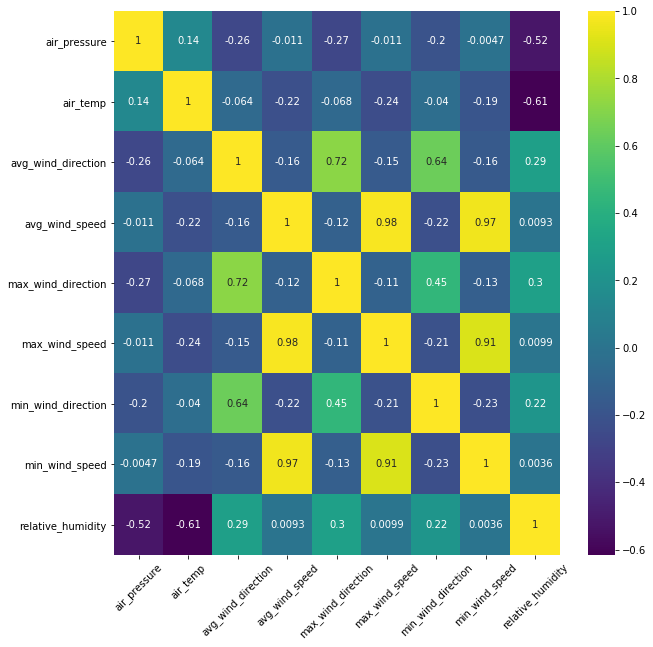

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='viridis',annot=True)
plt.xticks(rotation=45);
#avg wind speed and max wind speed is more related
#avg wind direction and max wind direction is more related
#(pressure - temp),(max wind direction - humidity),(max wind speed - humidity) are positively more related.

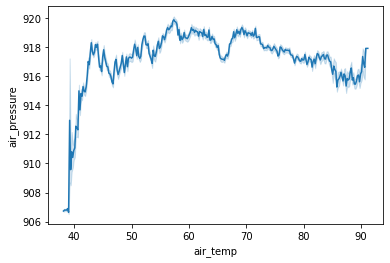

In [32]:
sns.lineplot(x="air_temp",y="air_pressure",data=d);
#As temp increases ....pressure is also increasing...

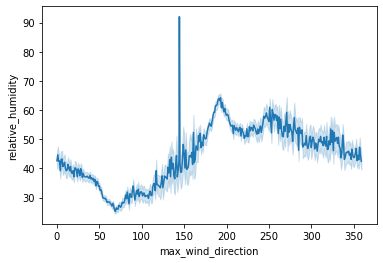

In [33]:
sns.lineplot(x=d["max_wind_direction"],y=d["relative_humidity"]);
# at approx 150 the relative humidity reaches max

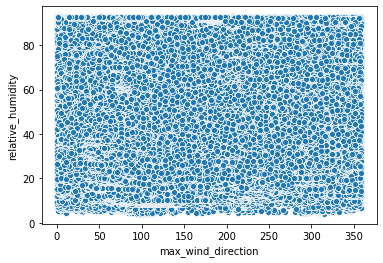

In [34]:
sns.scatterplot(x=d["max_wind_direction"],y=d["relative_humidity"]);
#tried to find a pattern -->but useless(null or no relationship)

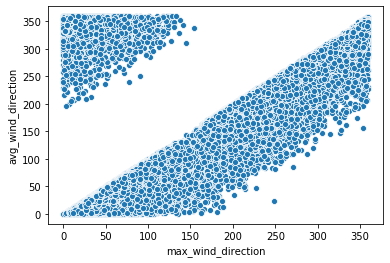

In [35]:
sns.scatterplot(x=d["max_wind_direction"],y=d["avg_wind_direction"]);
#tried to find a pattern -->Strong positive linear with outliers

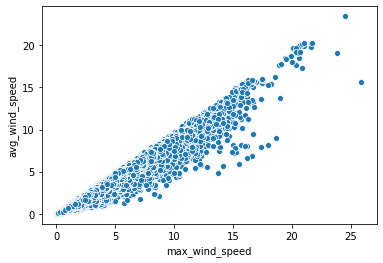

In [36]:
sns.scatterplot(x=d["max_wind_speed"],y=d["avg_wind_speed"]);
#tried to find a pattern -->Strong positive linear with outliers

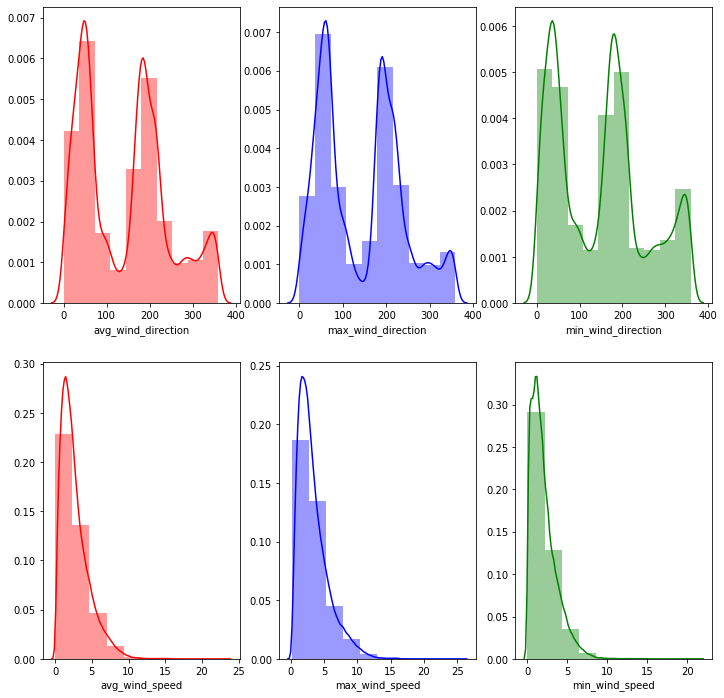

In [37]:
f,a=plt.subplots(nrows=2,ncols=3,figsize=(12,12))
sns.distplot(d['avg_wind_direction'],color="red",ax=a[0,0],bins=10)
sns.distplot(d['max_wind_direction'],color="blue",ax=a[0,1],bins=10)
sns.distplot(d['min_wind_direction'],color="green",ax=a[0,2],bins=10)
sns.distplot(d['avg_wind_speed'],color="red",ax=a[1,0],bins=10)
sns.distplot(d['max_wind_speed'],color="blue",ax=a[1,1],bins=10)
sns.distplot(d['min_wind_speed'],color="green",ax=a[1,2],bins=10);
#wind_speed is skewed right(positive skew)
#wind direction is randomly distributed

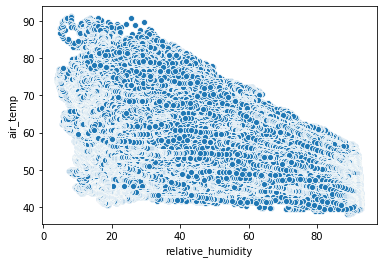

In [38]:
sns.scatterplot(x=d["relative_humidity"],y=d["air_temp"]);
#tried to find a pattern -->little bit negative distribution but not sure

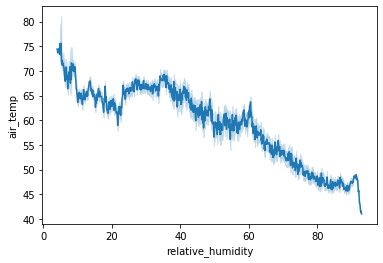

In [39]:
sns.lineplot(x=d["relative_humidity"],y=d["air_temp"]);
#as scatter doesnt confirm the pattern -->here its clear that both are inversely proportional

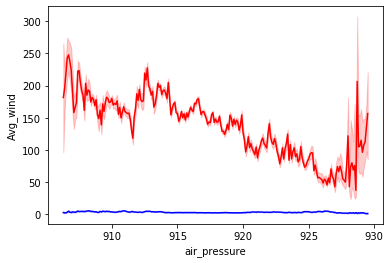

In [40]:
sns.lineplot(x=d["air_pressure"],y=d["avg_wind_direction"],color="red");
sns.lineplot(x=d["air_pressure"],y=d["avg_wind_speed"],color="blue");
plt.ylabel("Avg_wind");
#avg wind speed is linear on air pressure...whatever air pressure it is..speed is approx. 0
#hence wind_direction and pressure are relatable..

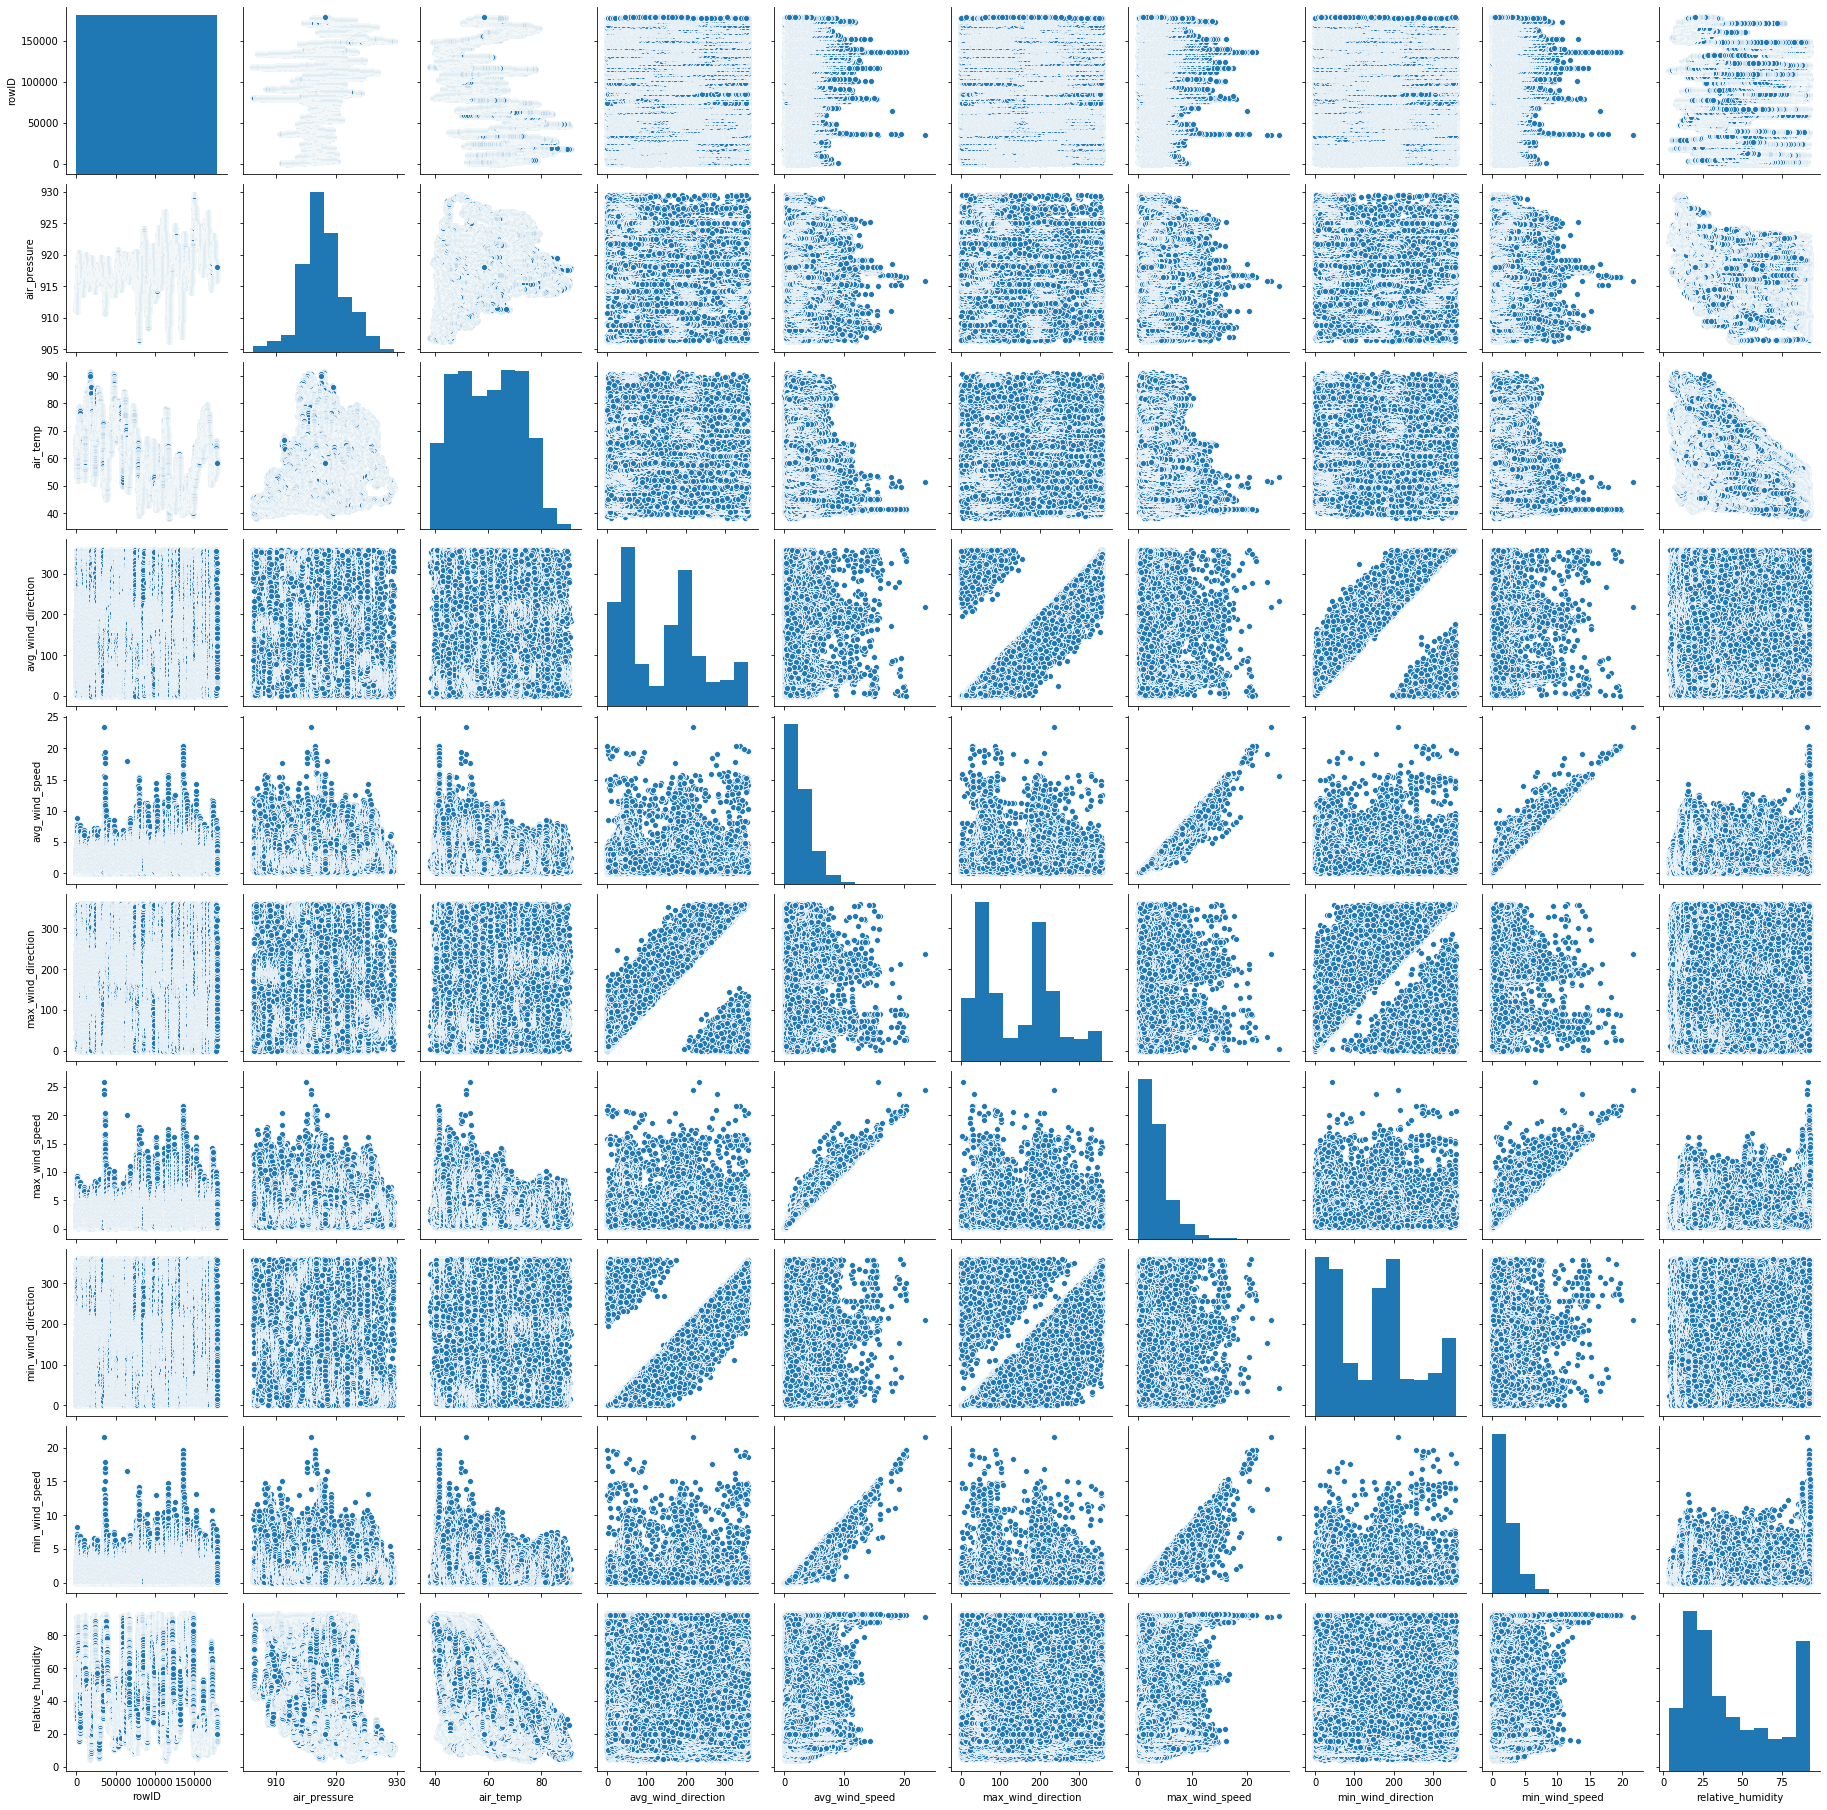

In [64]:
sns.pairplot(d)

In [41]:
for i in x:
    print("Standard Deviation of "+ i +" is ----->" +str(statistics.stdev(d[i]))) 
#spread of the variables of all columns..

Standard Deviation of air_pressure is ----->3.543248173882967
Standard Deviation of air_temp is ----->11.607485783339063
Standard Deviation of avg_wind_direction is ----->98.9400799841767
Standard Deviation of avg_wind_speed is ----->1.937286790673424
Standard Deviation of max_wind_direction is ----->93.77095858357768
Standard Deviation of max_wind_speed is ----->2.30489897062685
Standard Deviation of min_wind_direction is ----->104.8526429551303
Standard Deviation of min_wind_speed is ----->1.6246167320415443
Standard Deviation of relative_humidity is ----->28.02695025832808


In [42]:
for i in x:
    print("Mean of "+ i +" is ----->" +str((d[i].mean())))
#mid values of all columns..

Mean of air_pressure is ----->917.8481538426611
Mean of air_temp is ----->60.061305393107595
Mean of avg_wind_direction is ----->142.71531793523846
Mean of avg_wind_speed is ----->2.6902980817628017
Mean of max_wind_direction is ----->144.38482747049954
Mean of max_wind_speed is ----->3.328198087355311
Mean of min_wind_direction is ----->148.60286337453172
Mean of min_wind_speed is ----->2.041638610815918
Mean of relative_humidity is ----->43.5097496337864


# Implementation

In [47]:
#-->Hypothesis testing

In [48]:
#Null hypothesis


<b>Normalization</b>


In [43]:
feature_columns = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']
df_final = d

scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(df_final[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=df_final.index)
feature_minmax_transform.head()

#min-max normalization

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0      0.258621  0.501695            0.270195        0.051282   
1      0.258621  0.484746            0.448468        0.034188   
2      0.258621  0.491525            0.214485        0.029915   
3      0.258621  0.494915            0.247911        0.051282   
4      0.258621  0.494915            0.515320        0.017094   

   max_wind_direction  max_wind_speed  relative_humidity  
0            0.295265        0.058140           0.635546  
1            0.598886        0.054264           0.403825  
2            0.398329        0.042636           0.438695  
3            0.311978        0.058140           0.511811  
4            0.724234        0.034884           0.616423

In [44]:
test=df_final
target_adj_close = pd.DataFrame(test['air_temp'])
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0      0.258621  0.501695            0.270195        0.051282   
1      0.258621  0.484746            0.448468        0.034188   
2      0.258621  0.491525            0.214485        0.029915   
3      0.258621  0.494915            0.247911        0.051282   
4      0.258621  0.494915            0.515320        0.017094   

   max_wind_direction  max_wind_speed  relative_humidity  
0            0.295265        0.058140           0.635546  
1            0.598886        0.054264           0.403825  
2            0.398329        0.042636           0.438695  
3            0.311978        0.058140           0.511811  
4            0.724234        0.034884           0.616423

Shape of features :  (178858, 7)
Shape of target :  (178858, 1)


air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
178852      0.512931  0.379661            0.356546        0.038462   
178853      0.508621  0.379661            0.331476        0.051282   
178854      0.508621  0.379661            0.392758        0.021368   
178855      0.508621  0.383051            0.345404        0.085470   
178856      0.508621  0.383051            0.339833        0.072650   

        max_wind_direction  max_wind_speed  relative_humidity  
178852            0.498607        0.050388           0.179978  
178853            0.448468        0.058140           0.179978  
178854            0.506964        0.027132           0.177728  
178855            0.440111        0.093023           0.182227  
178856            0.493036        0.093023           0.178853

air_temp
178852     58.28
178853     58.28
178854     58.46
178855     58.46
178856     58.28


 -----After process------ 

Shape of features :  (178768, 7)
Shape of target :  (178768, 1)


air_temp
178763     56.12
178764     56.12
178765     56.12
178766     56.30
178767     56.30

# <center>DecisionTreeRegressor Model</center>

<b>Train test Split using Timeseriessplit

In [45]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
#spliting the dataset for training and testing

In [46]:
print("x train shape : ",X_train.shape)
print("x test shape : ",X_test.shape)
print("y train shape : ",y_train.shape)
print("y test shape : ",y_test.shape)

x train shape :  (162517, 7)
x test shape :  (16251, 7)
y train shape :  (162517,)
y test shape :  (16251,)


In [47]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
#function returns the rmse,r**2,plot of the model

RMSE:  0.20101987156508871
R2 score:  0.7798011768901584


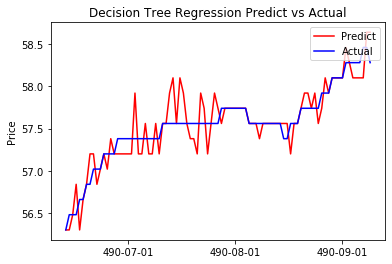

In [48]:
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')
#fitting and predicting using DTR

#  <center>LSTM Model</center> 

<b>process the data for lstm</b>

In [49]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
#using the train test split

<b>model building : LSTM </b>

In [50]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=50, batch_size=32, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/50
5079/5079 [==============================] - 9s 2ms/step - loss: 536.7440
Epoch 2/50
5079/5079 [==============================] - 8s 2ms/step - loss: 6.7652
Epoch 3/50
5079/5079 [==============================] - 8s 2ms/step - loss: 1.6349
Epoch 4/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.5691
Epoch 5/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.2506
Epoch 6/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.1428
Epoch 7/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.0893
Epoch 8/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.0613
Epoch 9/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.0407
Epoch 10/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.0291
Epoch 11/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.0371
Epoch 12/50
5079/5079 [==============================] - 8s 2ms/step - loss: 0.0446

<b>model evaluation</b>

In [51]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

predicted = model_lstm.predict(X_tst_t)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)

The R2 score on the Test set is:	0.999
RMSE:  0.16530763863890102


<b>visual predictions</b>

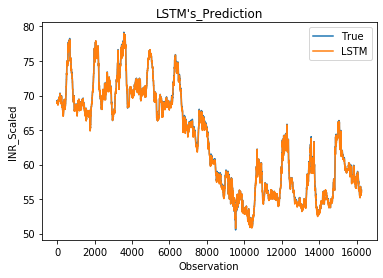

In [52]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# <center>K means</center>

In [53]:
select_df = d[feature_columns]
select_df.head(5)

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0         912.3     64.76                97.0             1.2   
1         912.3     63.86               161.0             0.8   
2         912.3     64.22                77.0             0.7   
3         912.3     64.40                89.0             1.2   
4         912.3     64.40               185.0             0.4   

   max_wind_direction  max_wind_speed  relative_humidity  
0               106.0             1.6               60.5  
1               215.0             1.5               39.9  
2               143.0             1.2               43.0  
3               112.0             1.6               49.5  
4               260.0             1.0               58.8

In [54]:
X = StandardScaler().fit_transform(select_df)

In [55]:
kmeans = KMeans(n_clusters=12)   # 12 clusters
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [56]:
centers = model.cluster_centers_
centers  # print centres of 12 clusters

array([[-0.28613225,  0.60996907,  0.55856336,  0.56094507,  0.67974726,
         0.49058605, -0.14020203],
       [ 1.65709683,  0.0886618 , -0.86373064, -0.08560005, -0.73590907,
        -0.0700285 , -0.96005111],
       [-0.19931356, -1.00039537, -0.96799037, -0.54828782, -0.80532455,
        -0.55143356,  0.95006327],
       [-0.11881486,  0.80482466, -1.0286822 , -0.57001019, -0.93322093,
        -0.6039049 , -0.51300538],
       [-1.11288095, -1.17712709,  0.5389663 ,  0.54408325,  0.65040814,
         0.54778605,  1.4823146 ],
       [-1.4117932 , -1.01112125,  0.20420422,  2.52257242,  0.28472733,
         2.53521552,  1.06956781],
       [ 1.0924866 , -0.52148635, -0.9210723 ,  2.07262658, -0.84597409,
         2.13798591, -0.88093189],
       [ 0.0224851 ,  0.85539994,  0.40290417, -0.6611709 ,  0.61936408,
        -0.66274147, -0.52961579],
       [ 0.02006087,  0.05434792,  2.00783647, -0.66360578, -1.31665328,
        -0.58234399,  0.00555826],
       [-0.07032132,  0.3122

In [57]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['class'] = P['prediction'].astype(int)
	return P

In [58]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'class', color = my_colors, marker='o')

In [59]:
P = pd_centers(features, centers)
P

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0      -0.286132  0.609969            0.558563        0.560945   
1       1.657097  0.088662           -0.863731       -0.085600   
2      -0.199314 -1.000395           -0.967990       -0.548288   
3      -0.118815  0.804825           -1.028682       -0.570010   
4      -1.112881 -1.177127            0.538966        0.544083   
5      -1.411793 -1.011121            0.204204        2.522572   
6       1.092487 -0.521486           -0.921072        2.072627   
7       0.022485  0.855400            0.402904       -0.661171   
8       0.020061  0.054348            2.007836       -0.663606   
9      -0.070321  0.312288           -0.944808        0.797033   
10     -0.312678 -0.918222            0.779215       -0.564623   
11      0.120928  0.494114            1.578226       -0.698620   

    max_wind_direction  max_wind_speed  relative_humidity  prediction  class  
0             0.679747        0.490586          -0.140202         0.0      0  
1            -0.735909       -0.070029          -0.960051         1.0      1  
2            -0.805325       -0.551434           0.950063         2.0      2  
3            -0.933221       -0.603905          -0.513005         3.0      3  
4             0.650408        0.547786           1.482315         4.0      4  
5             0.284727        2.535216           1.069568         5.0      5  
6            -0.845974        2.137986          -0.880932         6.0      6  
7             0.619364       -0.662741          -0.529616         7.0      7  
8            -1.316653       -0.582344           0.005558         8.0      8  
9            -0.880408        0.774684          -0.563383         9.0      9  
10            1.006279       -0.552901           1.242441        10.0     10  
11            1.876355       -0.667046          -0.562884        11.0     11

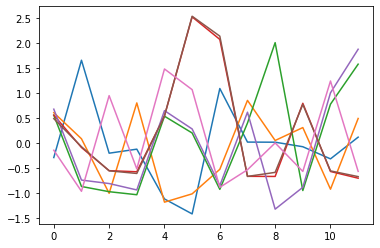

In [60]:
plt.plot(centers)

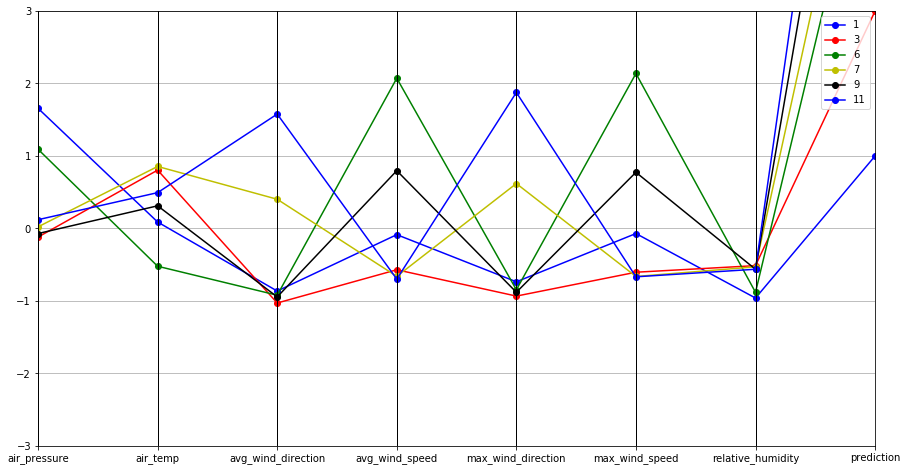

In [61]:
parallel_plot(P[P['relative_humidity'] < -0.5])     # summer

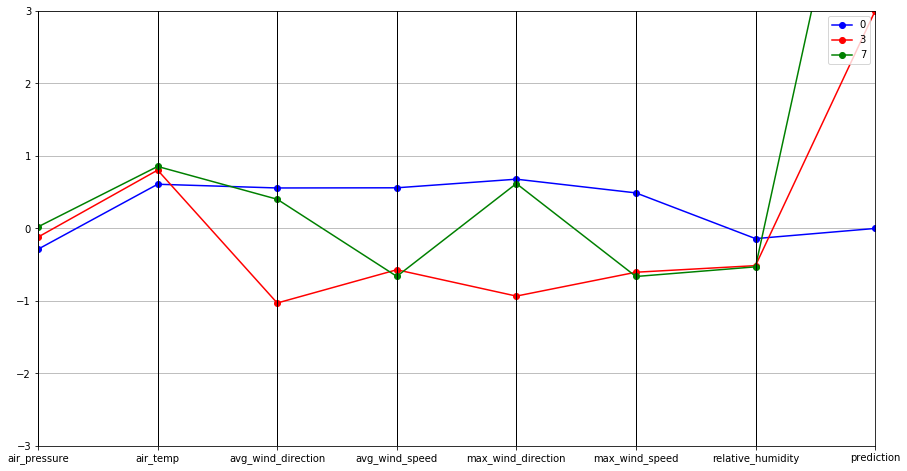

In [62]:
parallel_plot(P[P['air_temp'] > 0.5])      # srping

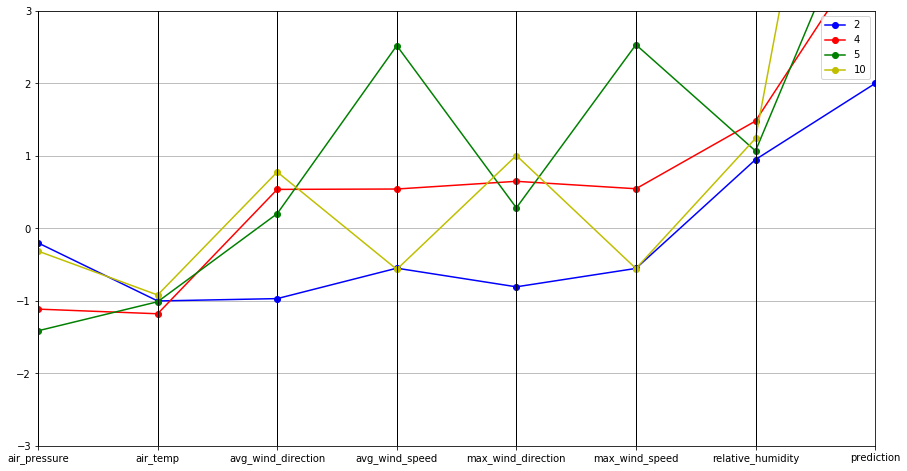

In [63]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])   # winter

# Result discussion

<tr>
    <td><b>S.No</b></td>
    <td><b>Algorithm</b></td>
    <td><b>RMSE</b></td>
    <td><b>R2 Score</b></td>
</tr>
<tr>
    <td>1</td>
    <td>Desicion tree Regression</td>
    <td>0.2010</td>
    <td>0.779</td>
</tr>
<tr>
    <td>2</td>
    <td>LSTM</td>
    <td>0.1653</td>
    <td>0.999</td>
</tr>